<a href="https://colab.research.google.com/github/BardRimon/Study/blob/main/Introduction_in_NLP/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9A%D0%BB%D1%8E%D0%BA%D0%B8%D0%BD.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 6. Извлечение именованных сущностей


1. Маскировать все адреса и имена в электронном письме.
2. Собрать из набора описаний IT-вакансий топ-5 требуемых навыков (скиллов) для Java-разработчика.
3. Улучшить качество базовой предсказательной CRF-модели на тестовой выборке за счет добавления и модификации признаков.
4. Улучшить качество базовой предсказательной LSTM-CRF-модели на тестовой выборке за счет подбора предобученных эмбеддингов.

[презентация](https://docs.google.com/presentation/d/1BQCx8LK4m9f9kHN78vym-tj7Zz_NxL7c/edit?slide=id.p1#slide=id.p1)

## задача 1: маркировка имён в email

In [ ]:
! pip -q install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.1 MB/s eta 0:00:00


In [ ]:
from natasha import Segmenter, NewsEmbedding, NewsNERTagger, Doc


email = """ Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?

Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.

----------------
Кому: Оксана Ивановна Александрова (alexandrova_oi@pfur.ru), Полина Юрьевна Повалко (povalko_pyu@pfur.ru), Валерия Владимировна Иванова (ivanova_vv@pfur.ru), Анна Дмитриевна Левшиц (levshits_ad@pfur.ru), Марина Игоревна Волк (volk_mi@pfur.ru), Валентин Викторович Матвиенко (matvienko_vv@pfur.ru), Елена Юрьевна Бурдовская (burdovskaya_eyu@pfur.ru), Гульчира Талгатовна Гарипова (garipova_gt@pfur.ru), Ольга Сергеевна Кочеткова (kochetkova_os@pfur.ru), Кристина Петровна Жикулина (zhikulina_kp@pfur.ru), Юлия Матвеевна Алюнина (aliunina_yum@pfur.ru), Мария Анатольевна Бородина (borodina_mra@pfur.ru), Светлана Анатольевна Петрова (petrova_sa@pfur.ru), Надежда Евгеньевна Железняк (zheleznyak_ne@pfur.ru), Тинатин Владимировна Чхиквадзе (chkhikvadze_tv@pfur.ru), Полина Александровна Бычкова (bychkova_pa@pfur.ru), Павел Михайлович Подолько (podolko_pm@pfur.ru), Ярослава Сергеевна Барышева (barysheva_yas@pfur.ru), Александр Викторович Клюкин (kliukin_av@pfur.ru), Лали Владиславовна Чебуханова (chebukhanova_lv@pfur.ru);
Тема: 15.05: Обсуждение результатов кейс-чемпионата;"""

print(email)

segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc = Doc(email)
doc.segment(segmenter)

doc.tag_ner(ner_tagger)
doc.ner.print()

 Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?
 
Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.
 
----------------
Кому: Оксана Ивановна Александрова (alexandrova_oi@pfur.ru), Полина Юрьевна Повалко (povalko_pyu@pfur.ru), Валерия Владимировна Иванова (ivanova_vv@pfur.ru), Анна Дмитриевна Левшиц (levshits_ad@pfur.ru), Марина Игоревна Волк (volk_mi@pfur.ru), Валентин Викторович Матвиенко (matvienko_vv@pfur.ru), Елена Юрьевна Бурдовская (burdovskaya_eyu@pfur.ru), Гульчира Талгатовна Гарипова (garipova_gt@pfur.ru), Ольга Сергеевна Кочеткова (kochetkova_os@pfur.ru), Кристина Петровна Жикулина (zhikulina_kp@pfur.ru), Юлия Матвеевна Алюнина (aliunina_yum@pfur.ru), Мария Анатольевна Бород

In [ ]:
replacements = []
for span in doc.spans:
  if span.type == 'PER':
    replacements.append((span.start, span.stop, '[ИМЯ]'))


masked_email = email
for start, stop, replacement_text in sorted(replacements, key=lambda x: x[0], reverse=True):
  masked_email = masked_email[:start] + replacement_text + masked_email[stop:]

print(masked_email)

 Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?
 
Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.
 
----------------
Кому: [ИМЯ] (alexandrova_oi@pfur.ru), [ИМЯ] (povalko_pyu@pfur.ru), [ИМЯ] (ivanova_vv@pfur.ru), [ИМЯ] (levshits_ad@pfur.ru), [ИМЯ] (volk_mi@pfur.ru), [ИМЯ] (matvienko_vv@pfur.ru), [ИМЯ] (burdovskaya_eyu@pfur.ru), [ИМЯ] (garipova_gt@pfur.ru), [ИМЯ] (kochetkova_os@pfur.ru), [ИМЯ] (zhikulina_kp@pfur.ru), [ИМЯ] (aliunina_yum@pfur.ru), [ИМЯ] (borodina_mra@pfur.ru), [ИМЯ] (petrova_sa@pfur.ru), [ИМЯ] (zheleznyak_ne@pfur.ru), [ИМЯ] (chkhikvadze_tv@pfur.ru), [ИМЯ] (bychkova_pa@pfur.ru), [ИМЯ] (podolko_pm@pfur.ru), [ИМЯ] (barysheva_yas@pfur.ru), [ИМЯ] (kliukin_av@pfur.ru), [ИМЯ]

## Поиск top 5 skills для java-разработчкика CRF
Собрать из набора описаний IT-вакансий топ-5 требуемых навыков (скиллов) для Java-разработчика.

### Неудачная попытка

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
# Set the path to the file you'd like to load
file_path = "IT_vacancies_full.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "konstantinalbul/russian-jokes",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-40-229c2ecfd29e>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 43.9M/43.9M [00:00<00:00, 67.7MB/s]

Extracting zip of IT_vacancies_full.csv...


In [ ]:
df.info()
javadf = df[df['Name'].str.contains('java', case=False) & ~df['Name'].str.contains('javascript', case=False)]
javadf.info()
javadf['Keys'].iloc[2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ids                 48564 non-null  int64  
 1   Employer            48564 non-null  object 
 2   Name                48564 non-null  object 
 3   Salary              48564 non-null  bool   
 4   From                15399 non-null  float64
 5   To                  10276 non-null  float64
 6   Experience          48564 non-null  object 
 7   Schedule            48564 non-null  object 
 8   Keys                48564 non-null  object 
 9   Description         48564 non-null  object 
 10  Area                48564 non-null  object 
 11  Professional roles  48564 non-null  object 
 12  Specializations     48564 non-null  object 
 13  Profarea names      48564 non-null  object 
 14  Published at        48564 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(11)
memory u

"['Java', 'Maven', 'Git', 'postman', 'Selenium IDE']"

In [ ]:
# решим на прямую
import ast
statistic = {}
for keys_str in javadf['Keys'].iloc[:100]:
    keys = ast.literal_eval(keys_str)


    for key in keys:
        print(key)
        if key in statistic:
            statistic[key] += 1
        else:
            statistic[key] = 1

sorted_statistic = dict(sorted(statistic.items(), key=lambda item: item[1], reverse=True))

sorted_statistic



PostgreSQL
Kotlin
Java
Spring Framework
dicom
Microservices
REST
Kafka
Java
Spring Framework
SQL
PostgreSQL
ООП
Unit Testing
Java
Maven
Git
postman
Selenium IDE
Java
QA automation
Java
Spring Framework
PostgreSQL
Highload
JVM
Java
Spring Framework
Hibernate ORM
Kafka
Spring Framework
Hibernate ORM
Apache Maven
Java
Java
Git
Unit Testing
Spring Framework
PostgreSQL
Spring Framework
REST
NoSQL
Web services
XML/JSON
Maven
Kubernaties
Git
GitFlow
Kafka
Design Patterns
RabbitMQ
Docker
REST
HTTP
Webpack
HTML
CSS
JOIN
API
JVM
Spring Framework
Желание учиться и развиваться
React
Vue.js
angular
Git
Eclipse
SQL
Java
Английский язык
Базы данных
Scrum
Java Core
Удаленная работа
Cистемы управления базами данных
Open source
DBeaver
Spring Framework
Hibernate ORM
Git
Java
Apache Maven
Spring Framework
Hibernate ORM
Git
Java
Apache Maven
JAVА SE
Java8
Spring
Groovy
Java 8
Spring Framework
gitflow
Docker
NoSQL
Kubernetes
CI/CD
Java
Java 11
Kotlin
Spring Framework
Spring Data
Spring Security
Git
Kafka
J

{'Java': 77,
 'Spring Framework': 42,
 'Git': 32,
 'SQL': 25,
 'PostgreSQL': 19,
 'ООП': 13,
 'Hibernate ORM': 12,
 'Английский язык': 12,
 'REST': 11,
 'Kotlin': 10,
 'Linux': 10,
 'Apache Maven': 9,
 'JavaScript': 9,
 'Kafka': 7,
 'Docker': 7,
 'MySQL': 6,
 'Maven': 5,
 'Atlassian Jira': 5,
 'Java EE': 5,
 'XML': 5,
 'JPA': 5,
 'JUnit': 5,
 'React': 4,
 'Spring Boot': 4,
 'Unit Testing': 3,
 'NoSQL': 3,
 'RabbitMQ': 3,
 'HTTP': 3,
 'HTML': 3,
 'Удаленная работа': 3,
 'Spring': 3,
 'Groovy': 3,
 'Kubernetes': 3,
 'Java 11': 3,
 'SOAP': 3,
 'Gradle': 3,
 'Selenium IDE': 2,
 'JVM': 2,
 'Design Patterns': 2,
 'CSS': 2,
 'Базы данных': 2,
 'Scrum': 2,
 'Java Core': 2,
 'Java 8': 2,
 'OpenShift': 2,
 'QA': 2,
 'JDBC': 2,
 'Python': 2,
 'HTML5': 2,
 'MongoDB': 2,
 'Java SE': 2,
 'Аналитическое мышление': 2,
 'Selenium': 2,
 'Функциональное тестирование': 2,
 'Нагрузочное тестирование': 2,
 'MS SQL': 2,
 'TestNG': 2,
 'dicom': 1,
 'Microservices': 1,
 'postman': 1,
 'QA automation': 1,
 'Hig

<Axes: >

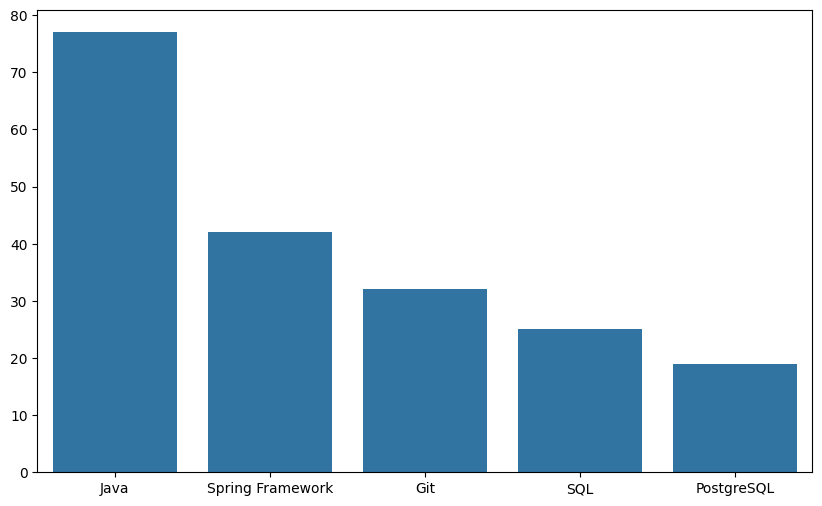

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_statistic.keys())[:5], y=list(sorted_statistic.values())[:5])

### Датасет из примера

In [1]:
! wget https://www.dropbox.com/s/resrekpsxk3yd4d/vacancies.csv


--2025-05-28 09:12:12--  https://www.dropbox.com/s/resrekpsxk3yd4d/vacancies.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw [following]
--2025-05-28 09:12:12--  https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8aef06d6d45529395683874b50.dl.dropboxusercontent.com/cd/0/inline/Cqi9X9_wAkobXfirgGtYsZZITTGwflkpW8WGBcM2lq9tDY32vbKERH4bwHhEwQ2niTOwWGc2ybO8d8My-Rs5jaO0912a3g_40LLRNsaJXOWoYonBcBjyZHkA4veyQTdiwIKYlY9taBkw6kqlMSCulgkm/file# [following]
--2025-05-28 09:12:13--  https://uc8aef06d6d45529395683874b50.dl.dropboxusercontent.com/cd/0/inlin

In [2]:
import pandas as pd
df_vacancies = pd.read_csv('vacancies.csv')
df_vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1215 non-null   int64 
 1   name              1215 non-null   object
 2   city              1215 non-null   object
 3   employer          1215 non-null   object
 4   publication_date  1215 non-null   object
 5   description       1215 non-null   object
dtypes: int64(1), object(5)
memory usage: 57.1+ KB


In [74]:
df_vacancies.head()

,id,name,city,employer,publication_date,description
0,29654783,Инженер удаленной технической поддержки рабочи...,Самара,Сбербанк,2019-04-26T14:37:49+0300,Обязанности: • Обработка/решение поступающих з...
1,29654641,Frontend разработчик,Москва,Сбербанк,2019-01-15T10:15:40+0300,Требования: Опыт web разработки от 3 лет (HTML...
2,29654639,JavaScript разработчик,Москва,Сбербанк,2019-01-15T10:15:36+0300,Требования: Опыт web разработки от 3 лет (HTML...
3,29654618,Ведущий инженер,Москва,Сбербанк,2019-01-15T10:15:10+0300,Сбербанк объявляет конкурс на позицию Ведущий ...
4,29668611,Главный инженер по сопровождению,Москва,Сбербанк,2019-02-12T09:00:00+0300,Обязанности:· Администрирование и сопровождени...


In [6]:
! pip install sklearn-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00


In [9]:
df_vacancies['description'] #по сути это спарсеный html код

,description
0,<p><strong>Обязанности:</strong></p> <p>• Обра...
1,<p><strong>Требования: </strong></p><p>Опыт we...
2,<p><strong>Требования: </strong></p><p>Опыт we...
3,<p>Сбербанк объявляет конкурс на позицию <stro...
4,<p><strong>Обязанности:</strong></p><p>· Админ...
...,...
1210,"<p>Мы движемся очень быстро, нам нужен сильный..."
1211,"<p>Tinkoff.ru ищет талантливых людей, готовых ..."
1212,<strong>Обязанности:</strong> <ul> <li>Проводи...
1213,<p>Мы вносим свой весомый вклад в развитие фин...


In [13]:
import re

def clean_text(text):

    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_vacancies['description'] = df_vacancies['description'].apply(clean_text)

df_vacancies['description']

,description
0,Обязанности: • Обработка/решение поступающих з...
1,Требования: Опыт web разработки от 3 лет (HTML...
2,Требования: Опыт web разработки от 3 лет (HTML...
3,Сбербанк объявляет конкурс на позицию Ведущий ...
4,Обязанности:· Администрирование и сопровождени...
...,...
1210,"Мы движемся очень быстро, нам нужен сильный пр..."
1211,"Tinkoff.ru ищет талантливых людей, готовых взя..."
1212,Обязанности: Проводить системный анализ поступ...
1213,Мы вносим свой весомый вклад в развитие финанс...


In [73]:
import pandas as pd
from sklearn_crfsuite import CRF

# Prepare data for CRF
def word2features(word):
    return {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }

def sent2features(sent):
    return [word2features(word) for word in sent.split()]

def sent2labels(sent, skills):
  labels = []
  words = sent.split()
  for word in words:
    if any(skill.lower() in word.lower() for skill in skills):
      labels.append('SKILL')
    else:
      labels.append('O')
  return labels


example_skills = ['Java', 'Spring', 'SQL', 'Hibernate', 'Maven', 'Git', 'Docker', 'Kubernetes']



X_train = [sent2features(desc) for desc in df_vacancies['description'].head(100)]
y_train = [sent2labels(desc, example_skills) for desc in df_vacancies['description'].head(100)]



crf = CRF(
    algorithm='lbfgs', # Limited-memory Broyden–Fletcher–Goldfarb–Shanno
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)

crf.fit(X_train, y_train)


def extract_skills_crf(description, crf_model):
    doc = description
    features = sent2features(doc)
    labels = crf_model.predict([features])[0]

    skills = []
    current_skill = []
    for word, label in zip(doc.split(), labels):
        if label == 'SKILL':
            current_skill.append(word)
        else:
            if current_skill:
                skills.append(" ".join(current_skill))
                current_skill = []
    if current_skill:
        skills.append(" ".join(current_skill))
    return skills



java_descriptions = df_vacancies[df_vacancies['name'].str.contains('java', case=False) & ~df_vacancies['name'].str.contains('javascript', case=False)]['description'].tolist()


all_extracted_skills = []
for description in java_descriptions:
    all_extracted_skills.extend(extract_skills_crf(description, crf))


skill_counts = pd.Series(all_extracted_skills).value_counts()


top_5_skills = skill_counts.head(5)

print("Top 5 skills for Java Developer:")
top_5_skills

Top 5 skills for Java Developer:


,count
Java,104
Spring,39
"Git,",26
"Spring, Hibernate,",21
SQL,16


### 3 Улучшить качество базовой предсказательной CRF-модели на тестовой выборке за счет добавления и модификации признаков.


In [40]:
import pandas as pd
from sklearn_crfsuite import CRF

def word2features_improved(sent, i):
    word = sent[i]
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'word.length()': len(word), # Добавленный признак: длина слова
        'word.startswith_cap()': word[0].isupper(), # Добавленный признак: начинается с заглавной буквы
    }

    if i > 0:
        word1 = sent[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:word.length()': len(word1), # Добавленный признак: длина предыдущего слова
        })
    else:
        features['BOS'] = True

    if i < len(sent) - 1:
        word1 = sent[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:word.length()': len(word1), # Добавленный признак: длина следующего слова
        })
    else:
        features['EOS'] = True

    return features

def sent2features_improved(sent):
    # Разбиваем предложение на слова и для каждого слова извлекаем признаки
    return [word2features_improved(sent.split(), i) for i in range(len(sent.split()))]



X_train_improved = [sent2features_improved(desc) for desc in df_vacancies['description'].head(100)]

# Инициализация CRF модели
crf_improved = CRF(
    algorithm='lbfgs', # Алгоритм L-BFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
    c1=0.1,            # Коэффициент L1 регуляризации
    c2=0.1,            # Коэффициент L2 регуляризации
    max_iterations=100, # Максимальное количество итераций
    all_possible_transitions=True # Учитывать все возможные переходы между метками
)

# Обучение CRF модели
# Убедитесь, что y_train правильно определен перед вызовом fit
crf_improved.fit(X_train_improved, y_train)

# Функция для извлечения навыков с использованием улучшенной CRF модели
def extract_skills_crf_improved(description, crf_model):
    doc = description
    features = sent2features_improved(doc)
    labels = crf_model.predict([features])[0] # predict возвращает список, берем первый элемент

    skills = []
    current_skill = []
    # Используем doc.split() для итерации по словам, чтобы соответствовать тому, как генерировались признаки
    for word, label in zip(doc.split(), labels):
        if label == 'SKILL':
            current_skill.append(word)
        else:
            if current_skill:
                skills.append(" ".join(current_skill))
                current_skill = []

    if current_skill:
        skills.append(" ".join(current_skill))
    return skills


all_extracted_skills_improved = []
for description in java_descriptions:
    all_extracted_skills_improved.extend(extract_skills_crf_improved(description, crf_improved))


skill_counts_improved = pd.Series(all_extracted_skills_improved).value_counts()
top_skills_improved = skill_counts_improved.head(6)

print("\nТоп навыки для Java разработчика (Улучшенная CRF модель):")
top_skills_improved


Топ навыки для Java разработчика (Улучшенная CRF модель):


,count
Java,102
Spring,35
"Git,",27
"Spring, Hibernate,",21
SQL,15
"digital,",9


### 4 Улучшить качество базовой предсказательной LSTM-CRF-модели на тестовой выборке за счет подбора предобученных эмбеддингов.

In [68]:
!pip install NLTK

In [72]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt_tab')
import re
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torchcrf import CRF




MAX_LEN = 256
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
BATCH_SIZE = 16
EPOCHS = 5 #
LEARNING_RATE = 1e-3

TRAIN_DATA_LIMIT = None

#  Список известных навыков

KNOWN_SKILLS = [
    "java", "jee", "j2ee", "spring", "spring boot", "springboot", "hibernate", "jpa",
    "sql", "mysql", "postgresql", "oracle", "sql server", "nosql", "mongodb", "cassandra",
    "rest", "soap", "restful", "microservices", "api", "apis",
    "aws", "azure", "gcp", "cloud", "docker", "kubernetes", "k8s",
    "git", "svn", "maven", "gradle", "jenkins", "ci/cd", "cicd",
    "jira", "confluence", "agile", "scrum", "tdd", "bdd",
    "kafka", "rabbitmq", "activemq", "messaging",
    "elasticsearch", "solr", "lucene",
    "html", "css", "javascript", "typescript", "angular", "react", "vue",
    "python", "scala", "kotlin", "groovy",
    "linux", "unix", "bash", "shell scripting",
    "data structures", "algorithms", "problem solving",
    "junit", "mockito", "testing", "selenium",
    "xml", "json", "yaml",
    "big data", "spark", "hadoop",
    "tomcat", "jetty", "jboss", "weblogic", "websphere",
    "design patterns", "software architecture", "system design",
    "oauth", "saml", "security"
]
KNOWN_SKILLS = sorted(list(set([s.lower() for s in KNOWN_SKILLS])), key=len, reverse=True)





df_to_process = df_vacancies.copy()
if TRAIN_DATA_LIMIT:
    df_to_process = df_to_process.head(TRAIN_DATA_LIMIT)

print(f"Будет обработано {len(df_to_process)} описаний.")

# Простой токенизатор
def tokenize_text(text):
    if not isinstance(text, str): # Проверка на случай, если в 'description' есть не строки
        return []
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s+#\-\.]', '', text)
    return nltk.word_tokenize(text, language='russian')

# --- 3. Эвристическая разметка (IOB формат: B-SKILL, I-SKILL, O) ---
sentences_tokens = [] # Список токенизированных предложений
tags_sequences = []      # Список соответствующих последовательностей тегов

tag2idx = {"O": 0, "B-SKILL": 1, "I-SKILL": 2, "PAD_TAG": 3}
idx2tag = {i: t for t, i in tag2idx.items()}
N_TAGS = len(tag2idx)

for desc_text in df_to_process['description']:
    tokens = tokenize_text(desc_text)
    if not tokens:
        continue

    current_tags = ['O'] * len(tokens)
    i = 0
    while i < len(tokens):
        matched_skill = False
        for skill_phrase in KNOWN_SKILLS:
            skill_tokens = skill_phrase.split()
            if not skill_tokens: continue

            if tokens[i:i+len(skill_tokens)] == skill_tokens:
                current_tags[i] = 'B-SKILL'
                for j in range(1, len(skill_tokens)):
                    if i + j < len(tokens): # Защита от выхода за пределы
                        current_tags[i+j] = 'I-SKILL'
                i += len(skill_tokens)
                matched_skill = True
                break
        if not matched_skill:
            i += 1

    sentences_tokens.append(tokens)
    tags_sequences.append(current_tags)

print(f"Обработано {len(sentences_tokens)} описаний для обучения/валидации.")
if not sentences_tokens:
    raise ValueError("Не было обработано ни одного предложения. Проверьте ваши описания или список KNOWN_SKILLS.")

# Создание словарей и индексация ---
word_counts = Counter(tok for sent in sentences_tokens for tok in sent)
vocab = ["PAD_WORD", "UNK_WORD"] + [w for w, c in word_counts.most_common()]
word2idx = {w: i for i, w in enumerate(vocab)}
N_WORDS = len(word2idx)
PAD_WORD_IDX = word2idx["PAD_WORD"]
PAD_TAG_IDX = tag2idx["PAD_TAG"]


X_indices = [[word2idx.get(tok, word2idx["UNK_WORD"]) for tok in s] for s in sentences_tokens]
y_indices = [[tag2idx[tag_name] for tag_name in t_seq] for t_seq in tags_sequences]


X_padded = np.array([s + [PAD_WORD_IDX] * (MAX_LEN - len(s)) if len(s) < MAX_LEN else s[:MAX_LEN] for s in X_indices], dtype=np.int64)
y_padded = np.array([s + [PAD_TAG_IDX] * (MAX_LEN - len(s)) if len(s) < MAX_LEN else s[:MAX_LEN] for s in y_indices], dtype=np.int64)

# Маска для CRF
attention_mask = (X_padded != PAD_WORD_IDX).astype(np.uint8)

if X_padded.shape[0] == 0:
    raise ValueError("Нет данных для обучения после обработки. Проверьте входные описания и список навыков.")

dataset = TensorDataset(torch.LongTensor(X_padded), torch.LongTensor(y_padded), torch.ByteTensor(attention_mask))
effective_batch_size = min(BATCH_SIZE, len(dataset))
if effective_batch_size == 0:
    raise ValueError("Dataset пуст. Невозможно создать DataLoader.")
train_loader = DataLoader(dataset, batch_size=effective_batch_size, shuffle=True)


#  Определение модели (BiLSTM-CRF)
class BiLSTM_CRF_Model(nn.Module):
    def __init__(self, vocab_size, tag_to_idx, embedding_dim, hidden_dim, pad_word_idx):
        super(BiLSTM_CRF_Model, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_idx = tag_to_idx
        self.tagset_size = len(tag_to_idx)
        self.pad_word_idx = pad_word_idx

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=self.pad_word_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.3) # Добавим Dropout для регуляризации
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)
        self.crf = CRF(self.tagset_size, batch_first=True)

    def _get_lstm_features(self, sentence_batch):
        embeds = self.embedding(sentence_batch)
        # embeds: (batch_size, seq_len, embedding_dim)
        lstm_out, _ = self.lstm(embeds)
        # lstm_out: (batch_size, seq_len, hidden_dim)
        lstm_out = self.dropout(lstm_out)
        lstm_feats = self.hidden2tag(lstm_out)
        # lstm_feats (emissions): (batch_size, seq_len, tagset_size)
        return lstm_feats

    def forward(self, sentence_batch, tags_batch=None, mask_batch=None):
        emissions = self._get_lstm_features(sentence_batch)

        if tags_batch is not None: # Режим обучения или вычисления потерь
            loss = -self.crf(emissions, tags_batch, mask=mask_batch.bool(), reduction='mean')
            return loss
        else: # Режим предсказания/декодирования
            decoded_tags = self.crf.decode(emissions, mask=mask_batch.bool())
            return decoded_tags


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTM_CRF_Model(N_WORDS, tag2idx, EMBEDDING_DIM, HIDDEN_DIM, PAD_WORD_IDX).to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


print(f"\nНачало обучения на {device}...")
if len(train_loader) == 0:
    print("DataLoader пуст. Пропуск обучения.")
else:
    for epoch in range(EPOCHS):
        model.train()
        epoch_loss = 0
        for i, (sentence_batch, tags_batch, mask_batch) in enumerate(train_loader):
            sentence_batch = sentence_batch.to(device)
            tags_batch = tags_batch.to(device)
            mask_batch = mask_batch.to(device)

            optimizer.zero_grad()
            loss = model(sentence_batch, tags_batch=tags_batch, mask_batch=mask_batch)

            if torch.isnan(loss) or torch.isinf(loss):
                print(f"Предупреждение: Обнаружена NaN или Inf потеря на эпохе {epoch+1}, батч {i+1}. Пропуск обновления.")
                if torch.isnan(loss):
                    for p in model.parameters():
                        if p.grad is not None:
                            p.grad.detach_()
                            p.grad.zero_()
                continue

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            epoch_loss += loss.item()

        avg_epoch_loss = epoch_loss / len(train_loader) if len(train_loader) > 0 else 0
        print(f"Эпоха {epoch+1}/{EPOCHS}, Потеря: {avg_epoch_loss:.4f}")


def extract_skills_lstm_crf(description_text, model_to_use, word_to_idx_map, idx_to_tag_map, max_seq_len, pad_word_idx_val, current_device):
    model_to_use.eval() # Переводим модель в режим оценки

    tokens = tokenize_text(description_text)
    if not tokens:
        return []


    predict_tokens = tokens[:max_seq_len]

    input_ids = [word_to_idx_map.get(tok, word_to_idx_map["UNK_WORD"]) for tok in predict_tokens]

    # Паддинг для одного предложения
    padded_input_ids = input_ids + [pad_word_idx_val] * (max_seq_len - len(input_ids))
    input_tensor = torch.LongTensor([padded_input_ids]).to(current_device)

    # Маска для одного предложения
    mask_np = (np.array(padded_input_ids) != pad_word_idx_val).astype(np.uint8)
    mask_tensor_single = torch.ByteTensor([mask_np]).to(current_device)


    with torch.no_grad():
        predicted_tag_indices_list = model_to_use(input_tensor, mask_batch=mask_tensor_single)
        if not predicted_tag_indices_list or not predicted_tag_indices_list[0]:
            return [] # Если предсказаний нет
        predicted_tag_indices = predicted_tag_indices_list[0] # Берем первую (и единственную) последовательность

    # Преобразуем индексы тегов в имена тегов, только для действительных токенов (до длины predict_tokens)
    predicted_tags = [idx_to_tag_map[tag_idx] for tag_idx in predicted_tag_indices[:len(predict_tokens)]]

    # Извлекаем навыки на основе тегов B-SKILL и I-SKILL
    extracted_skills = []
    current_skill_tokens = []
    for token, tag in zip(predict_tokens, predicted_tags): # Используем predict_tokens
        if tag == "B-SKILL":
            if current_skill_tokens: # Сохраняем предыдущий навык
                extracted_skills.append(" ".join(current_skill_tokens))
            current_skill_tokens = [token]
        elif tag == "I-SKILL" and current_skill_tokens:
            current_skill_tokens.append(token)
        else: # Тег 'O' или 'B-SKILL' без предыдущих токенов навыка
            if current_skill_tokens:
                extracted_skills.append(" ".join(current_skill_tokens))
                current_skill_tokens = []
    if current_skill_tokens: # Добавляем последний навык, если он есть
        extracted_skills.append(" ".join(current_skill_tokens))

    return extracted_skills


print("\nИзвлечение навыков из описаний с помощью BiLSTM-CRF...")
all_extracted_skills_lstm_crf = []



for description in df_to_process['description']:
    skills = extract_skills_lstm_crf(description, model, word2idx, idx2tag, MAX_LEN, PAD_WORD_IDX, device)
    all_extracted_skills_lstm_crf.extend(skills)

# Подсчет и вывод топ-5 навыков
skill_counts_lstm_crf = Counter(all_extracted_skills_lstm_crf)
top_5_skills_lstm_crf = skill_counts_lstm_crf.most_common(5)

print("\n--- Топ 5 извлеченных навыков (BiLSTM-CRF) ---")

for skill, count in top_5_skills_lstm_crf:
    print(f"- {skill}: {count} вхождений")




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Будет обработано 1215 описаний.
Обработано 1215 описаний для обучения/валидации.

Начало обучения на cpu...
Эпоха 1/5, Потеря: 19.4131
Эпоха 2/5, Потеря: 3.3632
Эпоха 3/5, Потеря: 0.7734
Эпоха 4/5, Потеря: 0.2556
Эпоха 5/5, Потеря: 0.1158

Извлечение навыков из описаний с помощью BiLSTM-CRF...


<ipython-input-72-81574e4a5608>:275: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  mask_tensor_single = torch.ByteTensor([mask_np]).to(current_device) # .bool() будет применено в forward



--- Топ 5 извлеченных навыков (BiLSTM-CRF) ---
- java: 334 вхождений
- sql: 331 вхождений
- python: 328 вхождений
- git: 292 вхождений
- linux: 218 вхождений
